In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [5]:
df = pd.read_csv(r'F:\18. MAJOR PROJECT\Data\DATA_FOR_HEART_RISK_PRED.csv')
print(f"Dataset loaded successfully: {df.shape[0]} rows, {df.shape[1]} columns")

Dataset loaded successfully: 312362 rows, 16 columns


In [9]:
df.head(5)

,heart_flag,creatinine_max,glucose_max,ast_max,alt_max,HR_max,NBPs_max,NBPd_max,NBPm_max,gender,anchor_age,anchor_year_group,race,marital_status,admission_type,insurance
0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,M,51,2008 - 2010,WHITE,SINGLE,EU OBSERVATION,Medicaid
1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,M,51,2008 - 2010,WHITE,SINGLE,EU OBSERVATION,Medicaid
2,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,M,51,2008 - 2010,WHITE,SINGLE,DIRECT OBSERVATION,Private
3,1,1.4,182.0,17.0,12.0,NaN,NaN,NaN,NaN,M,51,2008 - 2010,WHITE,SINGLE,OBSERVATION ADMIT,Medicaid
4,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,M,51,2008 - 2010,WHITE,SINGLE,EU OBSERVATION,Medicaid


In [24]:
print("\n--- Dataset Info ---")
print(df.info())


--- Dataset Info ---
<class 'pandas.core.frame.DataFrame'>
Index: 246989 entries, 0 to 312361
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   heart_flag         246989 non-null  int64  
 1   creatinine_max     187868 non-null  float64
 2   glucose_max        182441 non-null  float64
 3   ast_max            78608 non-null   float64
 4   alt_max            78253 non-null   float64
 5   HR_max             33934 non-null   float64
 6   NBPs_max           33601 non-null   float64
 7   NBPd_max           33601 non-null   float64
 8   NBPm_max           33596 non-null   float64
 9   gender             246989 non-null  object 
 10  anchor_age         246989 non-null  int64  
 11  anchor_year_group  246989 non-null  object 
 12  race               246989 non-null  object 
 13  marital_status     241521 non-null  object 
 14  admission_type     246989 non-null  object 
 15  insurance          243321 non-null

In [25]:
print("\n--- Missing Values (%) ---")
print((df.isnull().mean() * 100).round(2).sort_values(ascending=False))


--- Missing Values (%) ---
NBPs_max             86.40
NBPd_max             86.40
NBPm_max             86.40
HR_max               86.26
alt_max              68.32
ast_max              68.17
glucose_max          26.13
creatinine_max       23.94
marital_status        2.21
insurance             1.49
heart_flag            0.00
gender                0.00
anchor_year_group     0.00
anchor_age            0.00
race                  0.00
admission_type        0.00
dtype: float64


In [26]:
print("\n--- Target Distribution ---")
print(df["heart_flag"].value_counts(normalize=True) * 100)



--- Target Distribution ---
heart_flag
0    54.386228
1    45.613772
Name: proportion, dtype: float64


In [7]:
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
print("\n--- Numeric Columns ---")
df[numeric_cols].describe().T


--- Numeric Columns ---


,count,mean,std,min,25%,50%,75%,max
heart_flag,312362.0,0.500000,0.500001,0.0,0.0,0.5,1.0,1.0
creatinine_max,253057.0,1.622027,1.846720,0.0,0.8,1.0,1.5,74.0
glucose_max,247432.0,170.947165,2567.917477,23.0,108.0,137.0,187.0,1276103.0
ast_max,127139.0,133.681766,787.658167,0.0,20.0,30.0,60.0,42606.0
alt_max,126444.0,90.733170,448.097070,0.0,15.0,24.0,49.0,61854.0
HR_max,58762.0,376.119196,46341.889673,0.0,93.0,107.0,125.0,10000000.0
NBPs_max,58097.0,214.571734,7333.085338,38.0,133.0,149.0,166.0,1025100.0
NBPd_max,58095.0,173.689388,2203.505076,17.0,80.0,94.0,110.0,105125.0
NBPm_max,58106.0,568.278474,45851.364243,25.0,92.0,105.0,121.0,8999090.0
anchor_age,312362.0,60.400433,18.429028,18.0,48.0,62.0,75.0,91.0


In [28]:
def plot_boxplots(columns, n_cols=3):
    n_rows = int(np.ceil(len(columns)/n_cols))
    plt.figure(figsize=(n_cols*5, n_rows*4))
    for i, col in enumerate(columns, 1):
        plt.subplot(n_rows, n_cols, i)
        sns.boxplot(data=df, y=col, color='skyblue')
        plt.title(col)
    plt.tight_layout()
    plt.show()

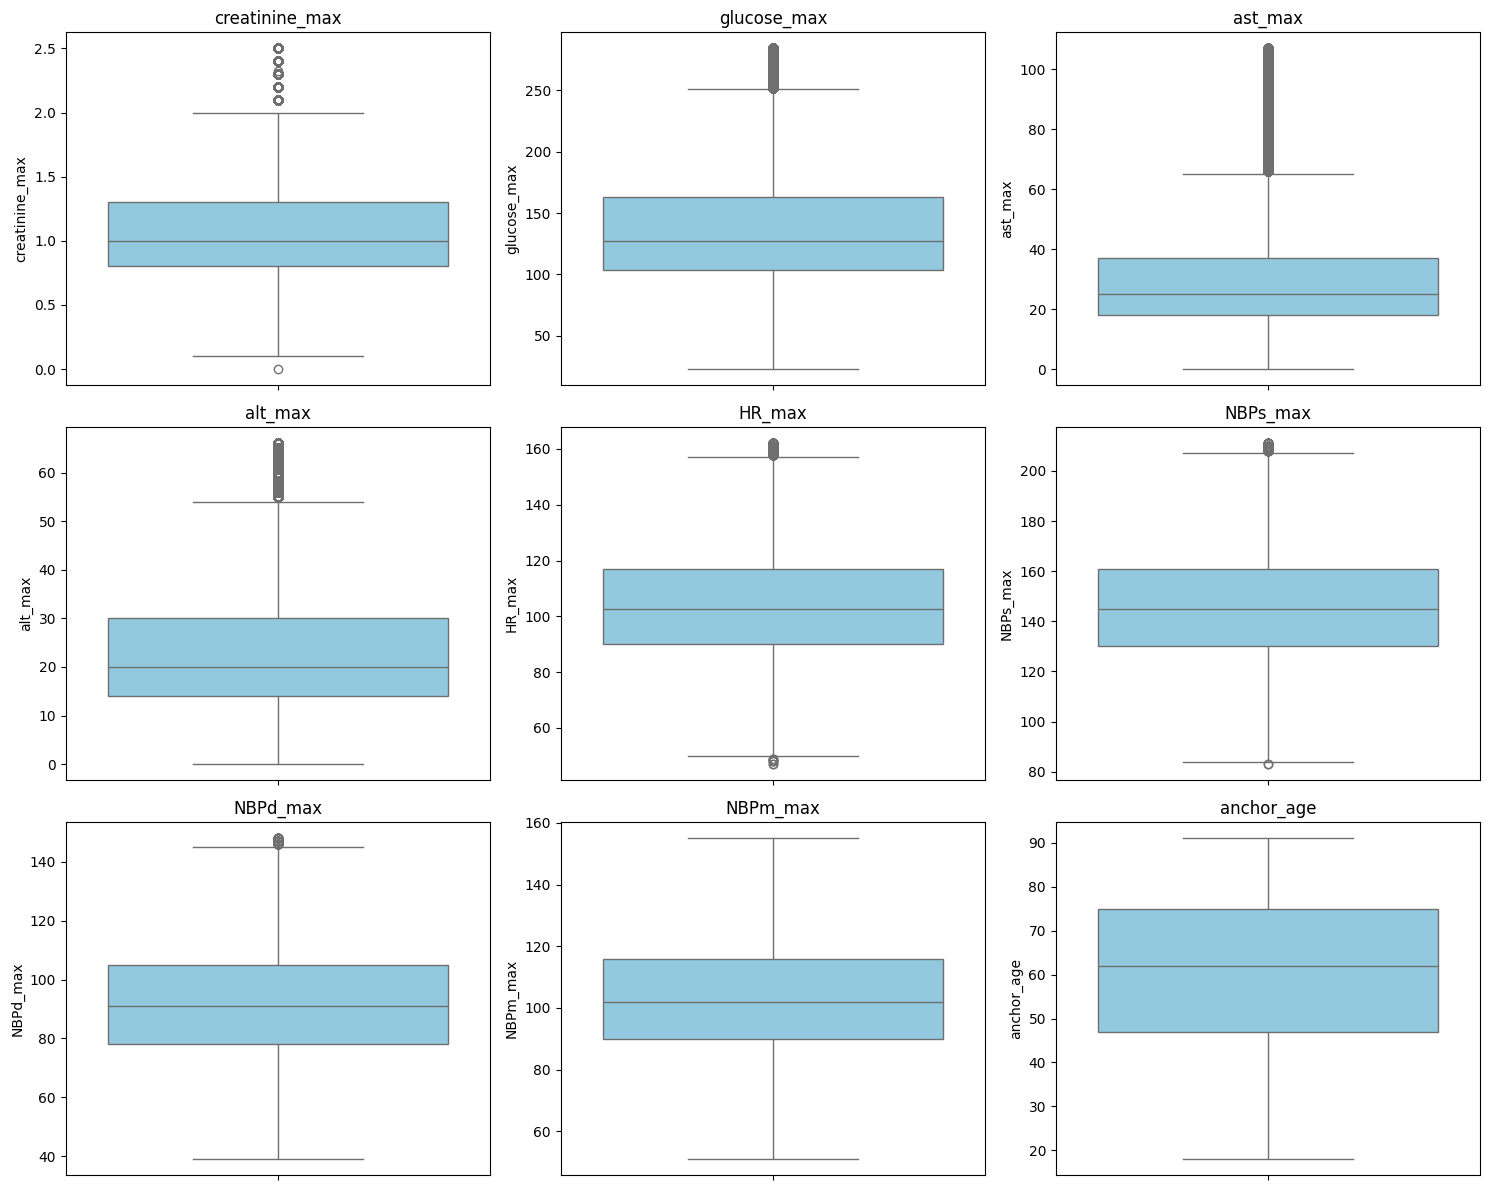

In [29]:
plot_boxplots([col for col in numeric_cols if col != 'heart_flag'])


📊 Distribution of numeric features...


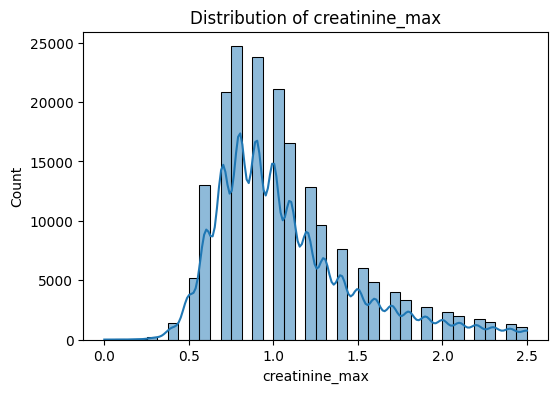

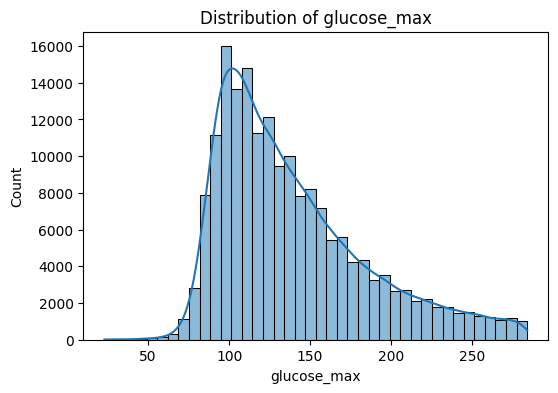

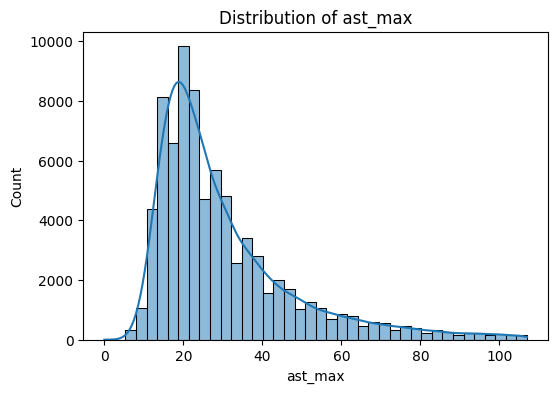

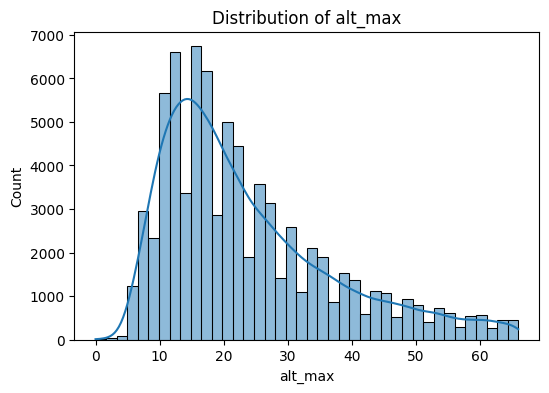

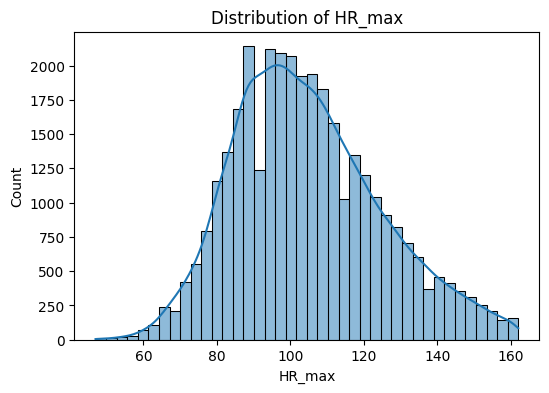

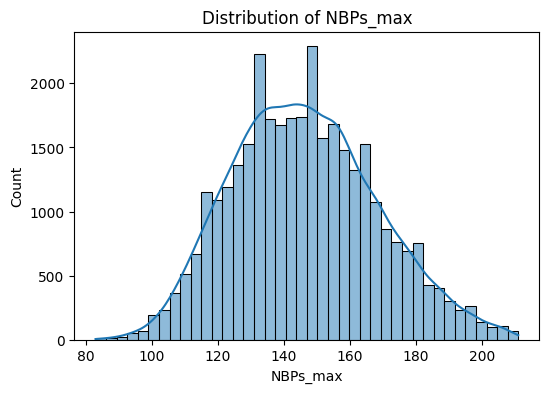

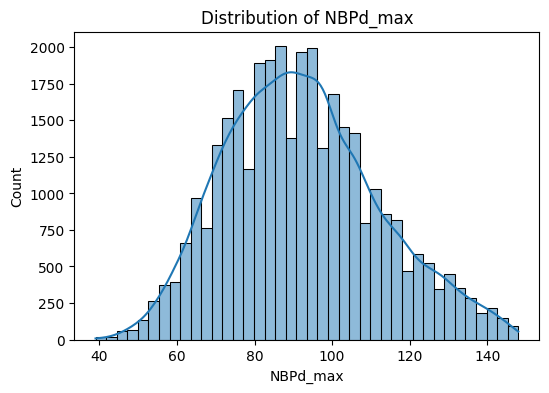

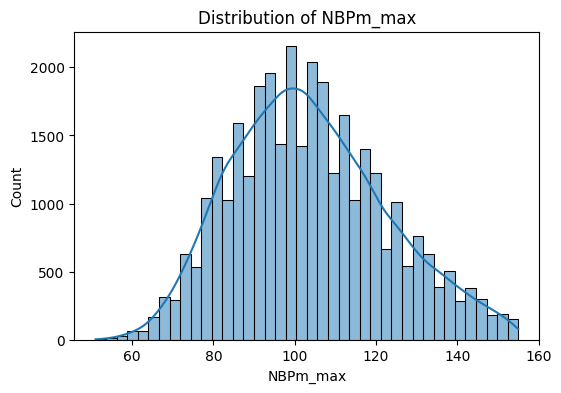

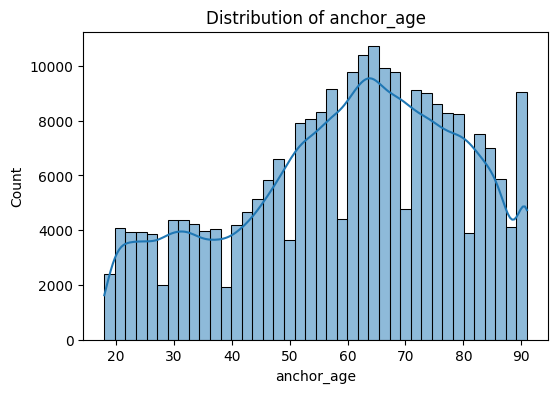

In [30]:
print("\n📊 Distribution of numeric features...")
for col in [c for c in numeric_cols if c != 'heart_flag']:
    plt.figure(figsize=(6,4))
    sns.histplot(df[col].dropna(), kde=True, bins=40)
    plt.title(f"Distribution of {col}")
    plt.show()

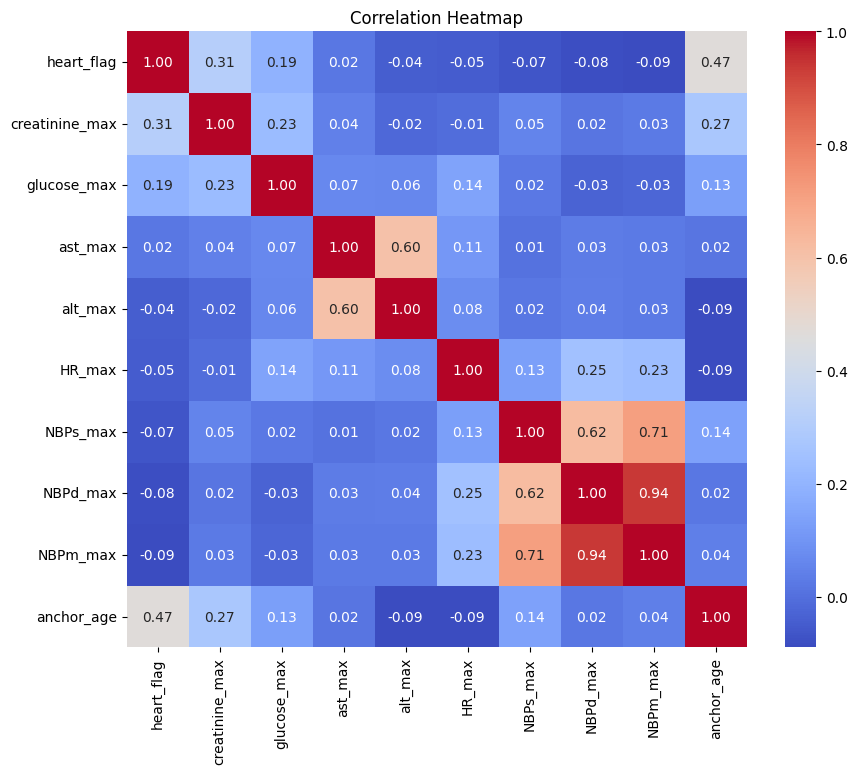

In [31]:
plt.figure(figsize=(10,8))
corr = df[numeric_cols].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()


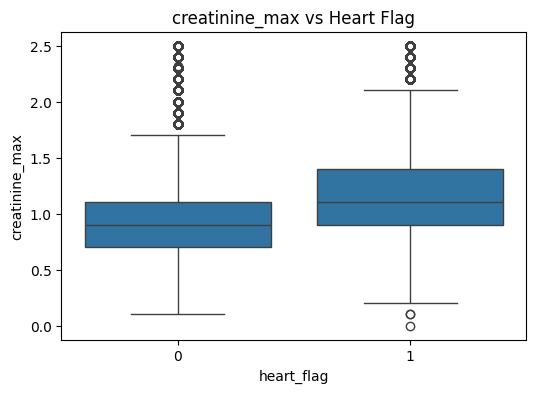

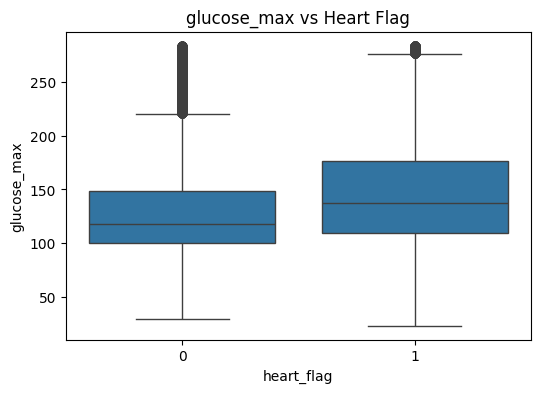

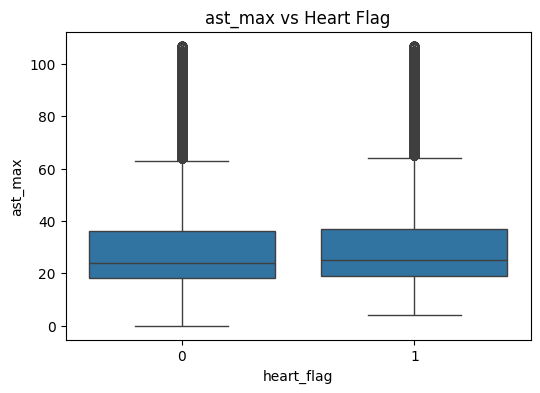

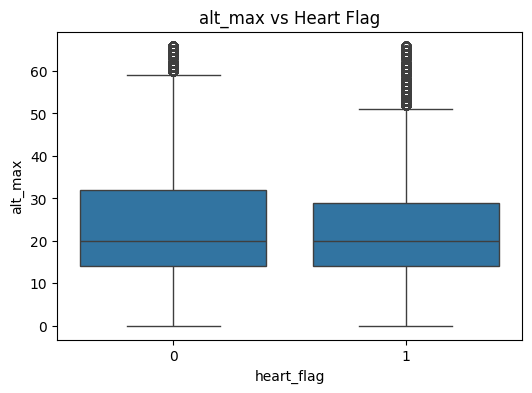

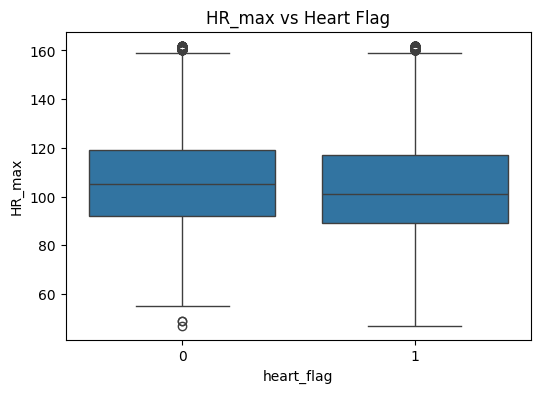

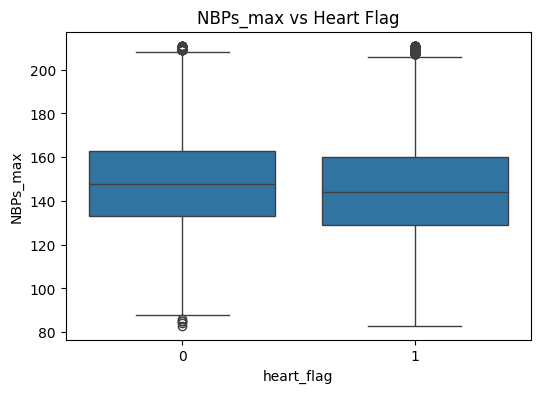

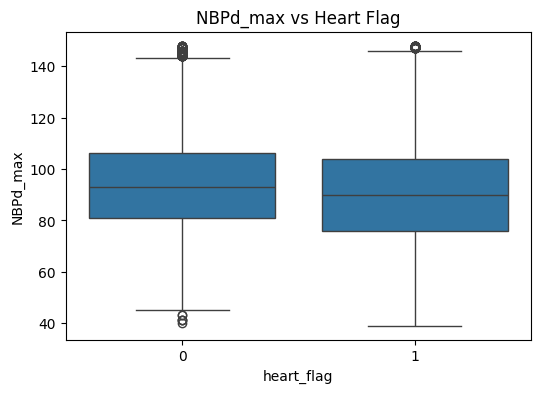

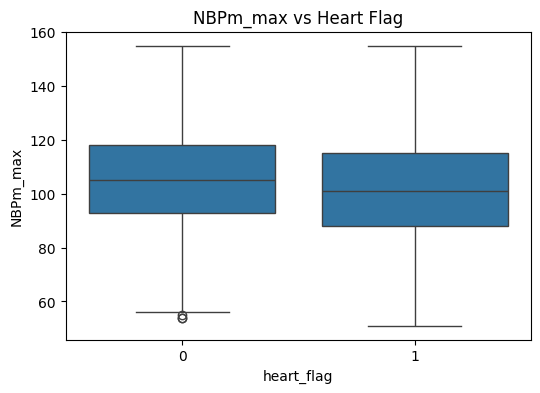

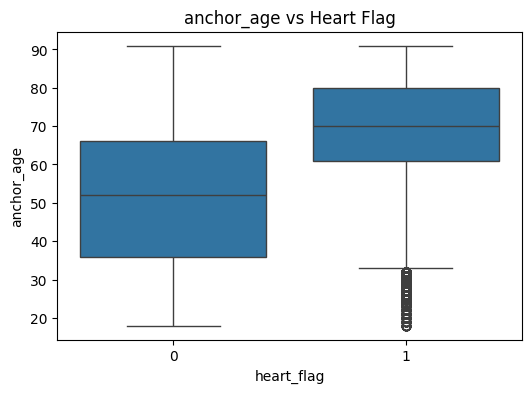

In [32]:
for col in [c for c in numeric_cols if c != 'heart_flag']:
    plt.figure(figsize=(6,4))
    sns.boxplot(x='heart_flag', y=col, data=df)
    plt.title(f"{col} vs Heart Flag")
    plt.show()

In [33]:
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
print("\n--- Categorical Columns ---")
print(categorical_cols)



--- Categorical Columns ---
['gender', 'anchor_year_group', 'race', 'marital_status', 'admission_type', 'insurance']


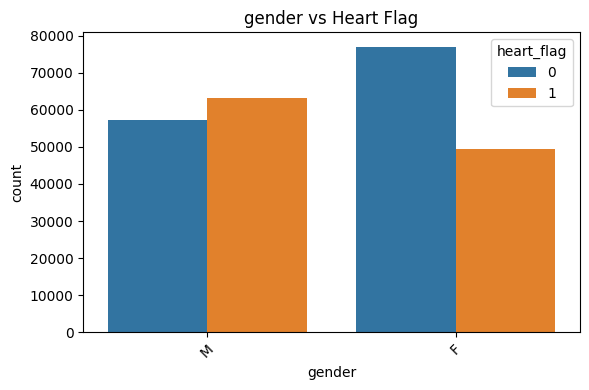

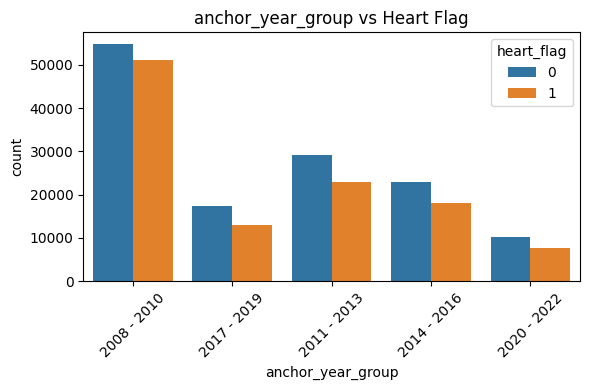

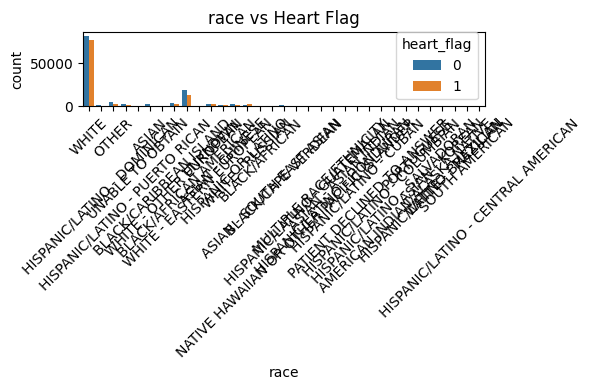

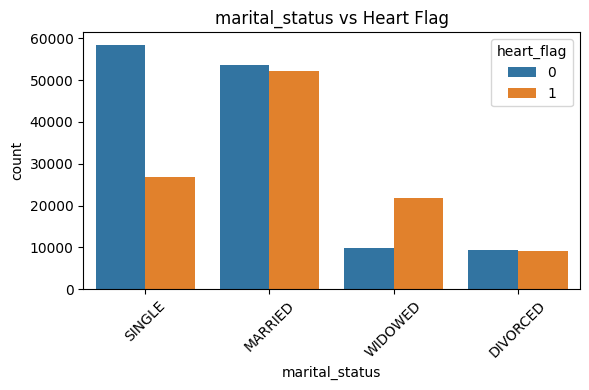

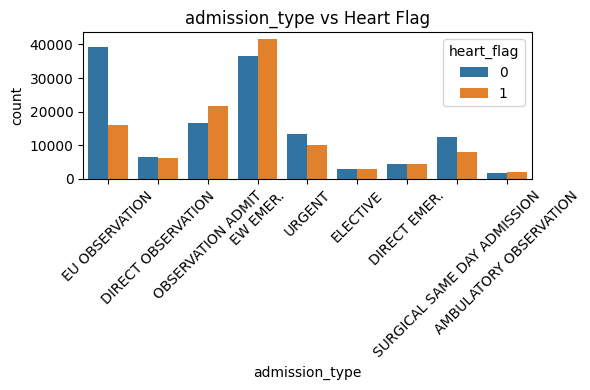

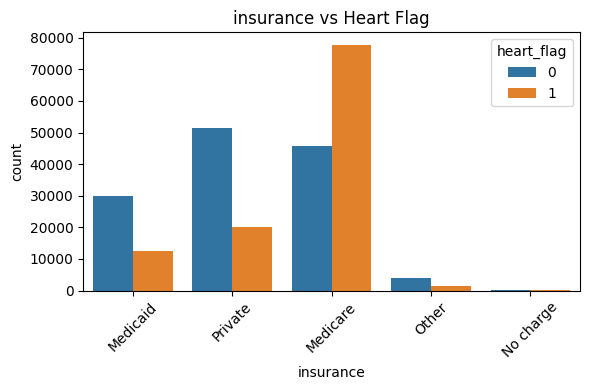

In [34]:
for col in categorical_cols:
    plt.figure(figsize=(6,4))
    sns.countplot(data=df, x=col, hue='heart_flag')
    plt.title(f"{col} vs Heart Flag")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

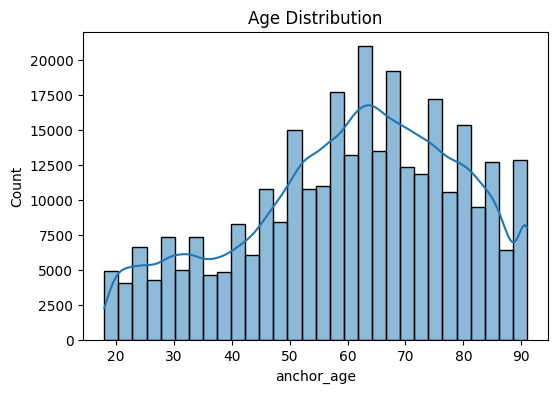

In [18]:
plt.figure(figsize=(6,4))
sns.histplot(df["anchor_age"], bins=30, kde=True)
plt.title("Age Distribution")
plt.show()

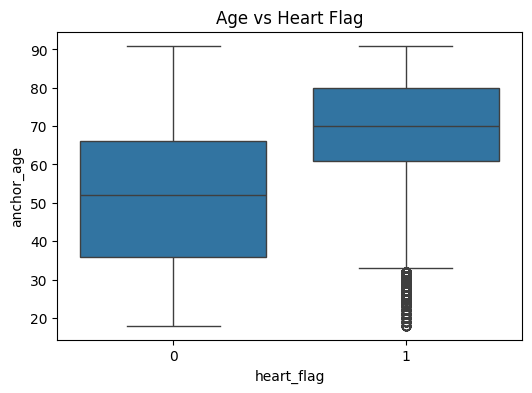

In [35]:
plt.figure(figsize=(6,4))
sns.boxplot(x='heart_flag', y='anchor_age', data=df)
plt.title("Age vs Heart Flag")
plt.show()

In [36]:
corr_target = df[numeric_cols].corr()["heart_flag"].sort_values(ascending=False)
print("\n--- Correlation with Heart Flag ---")
print(corr_target)


--- Correlation with Heart Flag ---
heart_flag        1.000000
anchor_age        0.466309
creatinine_max    0.312759
glucose_max       0.194784
ast_max           0.018318
alt_max          -0.044571
HR_max           -0.048432
NBPs_max         -0.067935
NBPd_max         -0.081730
NBPm_max         -0.088295
Name: heart_flag, dtype: float64


In [8]:
# Function to remove outliers using IQR method
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    before = len(df)
    df = df[(df[column].isna()) | ((df[column] >= lower) & (df[column] <= upper))]
    removed = before - len(df)
    print(f"{column}: removed {removed} rows ({(removed/before)*100:.2f}%)")
    return df

# Apply outlier removal
for col in numeric_cols:
    df = remove_outliers_iqr(df, col)

print(f"\n✅ After outlier removal: {df.shape}")

# Check new numeric stats
print("\n--- Updated Numeric Summary ---")
print(df[numeric_cols].describe().T)

# Save cleaned dataset
df.to_csv("final_heart_nonheart_labs_balanced_extended_clean.csv", index=False)
print("\n💾 Saved cleaned dataset as 'final_heart_nonheart_labs_balanced_extended_clean.csv'")


heart_flag: removed 0 rows (0.00%)
creatinine_max: removed 29704 rows (9.51%)
glucose_max: removed 14771 rows (5.23%)
ast_max: removed 11956 rows (4.46%)
alt_max: removed 6895 rows (2.69%)
HR_max: removed 642 rows (0.26%)
NBPs_max: removed 395 rows (0.16%)
NBPd_max: removed 651 rows (0.26%)
NBPm_max: removed 359 rows (0.15%)
anchor_age: removed 0 rows (0.00%)

✅ After outlier removal: (246989, 16)

--- Updated Numeric Summary ---
                   count        mean        std   min    25%    50%    75%  \
heart_flag      246989.0    0.456138   0.498073   0.0    0.0    0.0    1.0   
creatinine_max  187868.0    1.072463   0.420221   0.0    0.8    1.0    1.3   
glucose_max     182441.0  139.236882  46.023597  23.0  104.0  127.0  163.0   
ast_max          78608.0   30.362075  17.817913   0.0   18.0   25.0   37.0   
alt_max          78253.0   23.664383  13.413746   0.0   14.0   20.0   30.0   
HR_max           33934.0  104.747663  20.056355  47.0   90.0  102.5  117.0   
NBPs_max         336